# Importing necessary libraries and tools

In [68]:
import numpy as np
import pandas as pd 

## Generating fictional data (as realistic as possible) about users purshases

In [77]:

# Setting random seed for reproducibility
#np.random.seed(42)

# Number of users
num_users = 10000

# Simulate Sales and User Data
games = [
    "Assassin's Creed Black Flag", 
    "Assassin's Creed Unity", 
    "Assassin's Creed Syndicate", 
    "Assassin's Creed Origins", 
    "Assassin's Creed Odissey", 
    "Assassin's Creed Valhalla", 
    "Assassin's Creed Mirage", 
    "Watch Dogs",
    "Watch Dogs 2", 
    "Rainbow Six Siege", 
    "Far Cry 5", 
    "Far Cry 6",
    "Anno 2070",
    "Anno 1800",
    "The Crew",
    ]
platforms = ["PC", "PS5", "PS4", "Xbox", "Switch"]

user_ids = range(1, num_users + 1)
game_titles = np.random.choice(games, num_users)
purchase_dates = pd.date_range(start="2021-01-01", end="2023-10-31", freq="D").to_numpy()
selected_dates = np.random.choice(purchase_dates, num_users)
platforms_selected = np.random.choice(platforms, num_users)
prices = np.random.uniform(20, 60, num_users)  # Price range from 20 to 60
in_game_purchases = np.random.randint(0, 5, num_users)  # Number of in-game purchases

# Simulate Gamer Behavior Data
hours_played = np.random.randint(1, 100, num_users)
game_progression = np.random.randint(1, 101, num_users) 
achievements_unlocked = np.random.randint(0, 51, num_users)
multiplayer_usage = np.random.randint(0, 2, num_users)  # 1 for multiplayer, 0 for single-player

# Simulate Gamer Motivations, Expectations, and Satisfaction Surveys
reason_for_playing = np.random.randint(1, 6, num_users)
expectation_score = np.random.randint(1, 11, num_users)
satisfaction_score = np.random.randint(1, 11, num_users)

# Create DataFrame
df = pd.DataFrame({
    "UserID": user_ids,
    "GameTitle": game_titles,
    "PurchaseDate": selected_dates,
    "Platform": platforms_selected,
    "Price": prices,
    "InGamePurchases": in_game_purchases,
    "HoursPlayed": hours_played,
    "GameProgression": game_progression,
    "AchievementsUnlocked": achievements_unlocked,
    "MultiplayerUsage": multiplayer_usage,
    "ReasonForPlaying": reason_for_playing,
    "ExpectationScore": expectation_score,
    "SatisfactionScore": satisfaction_score
})

df.head() 

,UserID,GameTitle,PurchaseDate,Platform,Price,InGamePurchases,HoursPlayed,GameProgression,AchievementsUnlocked,MultiplayerUsage,ReasonForPlaying,ExpectationScore,SatisfactionScore
0,1,Anno 1800,2021-07-20,PS5,25.753325,1,46,27,45,0,4,9,6
1,2,Assassin's Creed Odissey,2022-11-18,PS5,45.033100,2,78,20,48,1,3,10,3
2,3,Anno 1800,2021-10-03,PS5,40.302989,0,71,50,28,0,1,7,6
3,4,Far Cry 6,2022-07-07,PS4,50.335581,4,43,11,9,0,3,3,5
4,5,Watch Dogs,2022-09-09,Switch,30.226732,4,71,17,19,1,1,1,1


## Printing some general statistics about our data

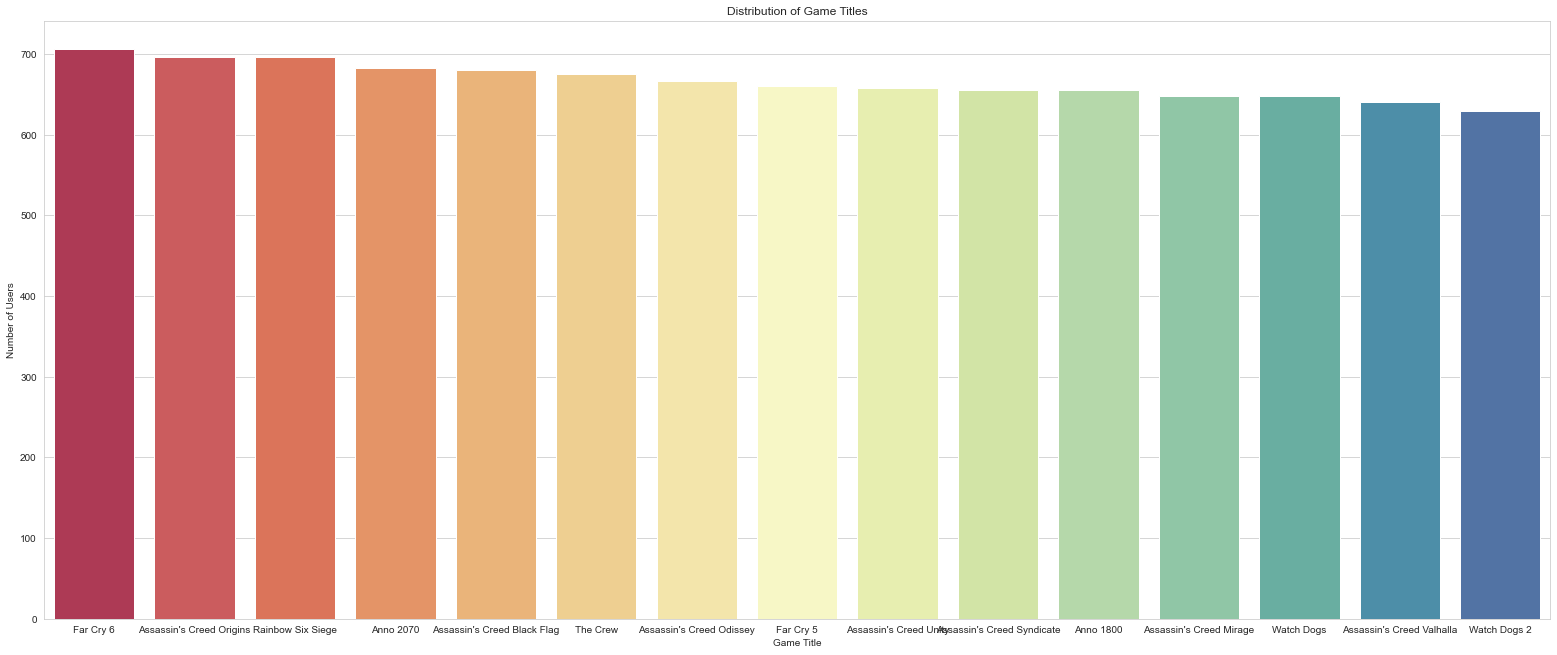

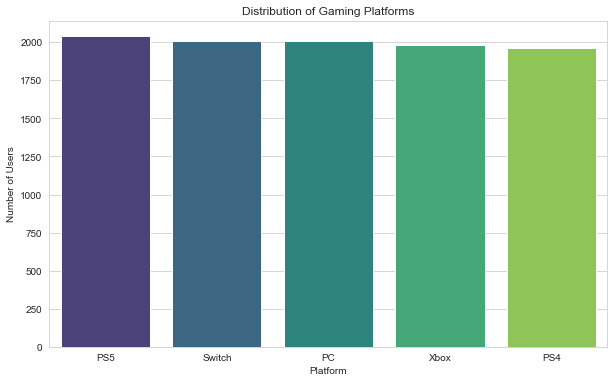

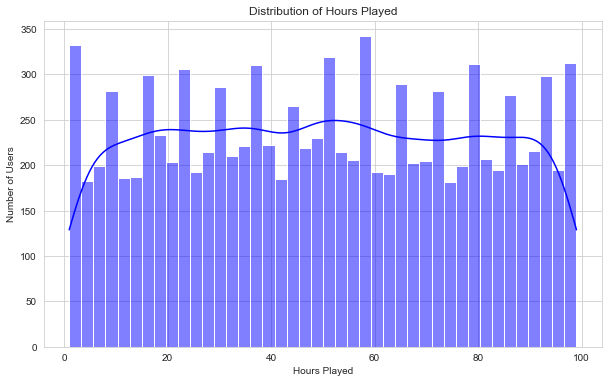

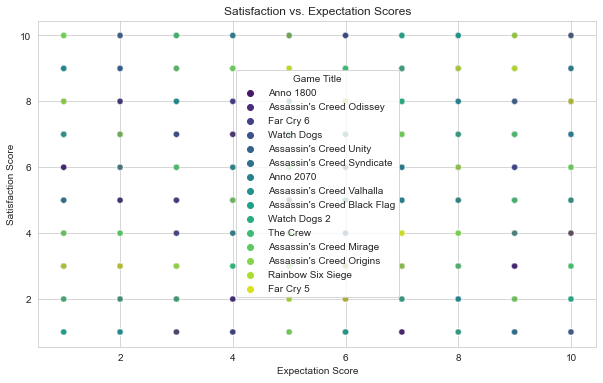

In [78]:
df.describe() 
import string 

import matplotlib.pyplot as plt
import seaborn as sns

# Set style for the plots
sns.set_style("whitegrid")

# Distribution of Game Titles
plt.figure(figsize=(27, 11))
sns.countplot(data=df, x="GameTitle", order=df["GameTitle"].value_counts().index, palette="Spectral")
plt.title("Distribution of Game Titles")
plt.ylabel("Number of Users")
plt.xlabel("Game Title")
plt.show()

# Distribution of Platforms
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Platform", order=df["Platform"].value_counts().index, palette="viridis")
plt.title("Distribution of Gaming Platforms")
plt.ylabel("Number of Users")
plt.xlabel("Platform")
plt.show()

# Distribution of Hours Played
plt.figure(figsize=(10, 6))
sns.histplot(df["HoursPlayed"], bins=42, color="Blue", kde=True)
plt.title("Distribution of Hours Played")
plt.ylabel("Number of Users")
plt.xlabel("Hours Played")
plt.show()

# Scatter plot of Satisfaction vs. Expectation
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="ExpectationScore", y="SatisfactionScore", hue="GameTitle", palette="viridis", alpha=0.7)
plt.title("Satisfaction vs. Expectation Scores")
plt.ylabel("Satisfaction Score")
plt.xlabel("Expectation Score")
plt.legend(title="Game Title")
plt.show()




## User Segmentation

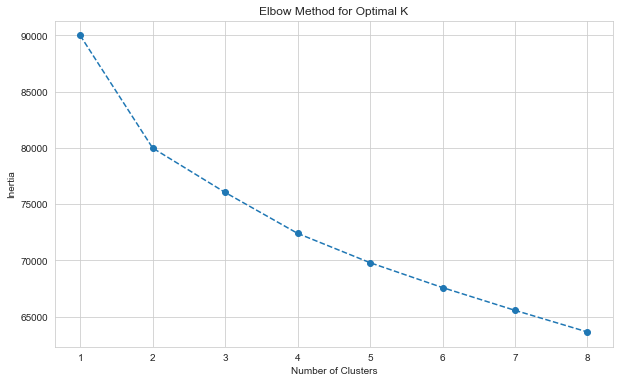

In [84]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Selecting relevant features for clustering
cluster_data = df[["Price", "InGamePurchases", "HoursPlayed", "GameProgression", "AchievementsUnlocked",
                   "MultiplayerUsage", "ReasonForPlaying", "ExpectationScore", "SatisfactionScore"]]

# Scaling the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_data)

# Checking if there are any missing values
try:
    missing_values = cluster_data.isnull().sum().sum()

except BaseException as missing_values:
    "There is missing values into the clustering process"
    

# Finding the optimal number of clusters using the Elbow Method
inertia = []
for i in range(1, 9):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 9), inertia, marker="o", linestyle="--")
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()




#### K starts to decrease as a slower rate from around 7, Let's apply K-Means algorithm to 7 clusters !

In [89]:
from sklearn.cluster import KMeans

# Assuming K = 3; replace with your chosen value if different
K = 7
kmeans_model = KMeans(n_clusters=K, random_state=42)

# Fit Model to Scaled Data
kmeans_model.fit(scaled_data)

# Assign cluster number to users
cluster_assignments = kmeans_model.labels_
df["Cluster"] = cluster_assignments
print(df["Cluster"])



0       4
1       5
2       4
3       6
4       5
       ..
9995    1
9996    3
9997    0
9998    0
9999    5
Name: Cluster, Length: 10000, dtype: int32


#### Clusters Analysis

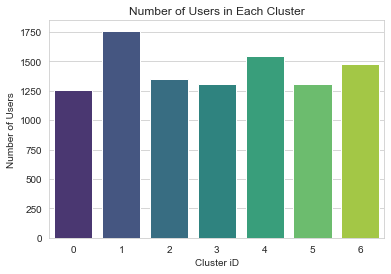

       Price  InGamePurchases  HoursPlayed  GameProgression  \
0  41.116763         0.805051    76.438043        49.218627   
1  39.489140         1.991472    45.630472        51.474702   
2  41.934226         3.161194    49.529104        77.497761   
3  40.975744         0.804132    22.420811        49.039786   
4  38.369329         2.023964    54.280440        50.941710   
5  35.633999         3.189313    49.017557        23.732061   
6  42.546346         2.023761    53.174474        47.260014   

   AchievementsUnlocked  MultiplayerUsage  ReasonForPlaying  ExpectationScore  \
0             22.674822      9.834254e-01          3.002368          5.018153   
1             26.188175      6.661338e-16          2.998294          5.596930   
2             23.014179      9.925373e-01          3.194776          5.532090   
3             28.406274      9.732211e-01          2.862280          5.775057   
4             25.592617      2.590674e-03          2.879534          8.036269   
5        

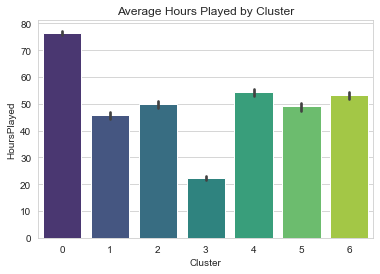

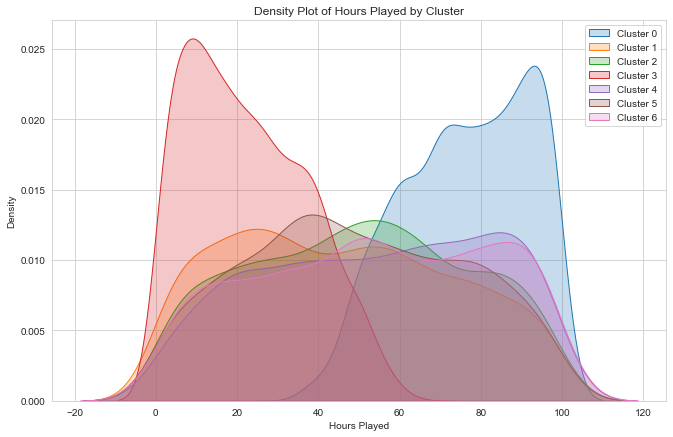

As Clusters 0 and 3 seems to contains and represents sorts of outliers, we can consider looking for a data preparetion step to clean outliers values according to functionals rules about hours spent on a game.


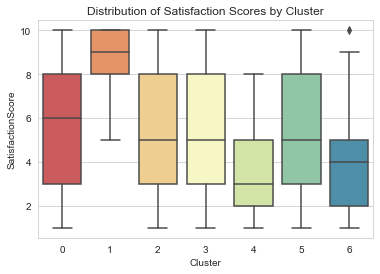

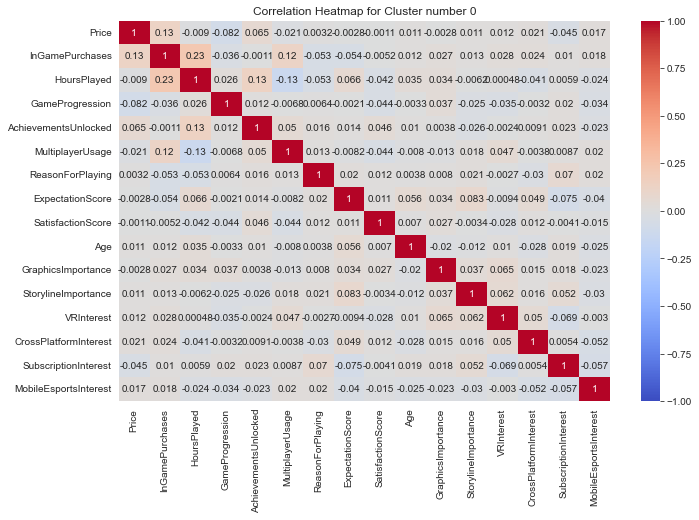

Here we can see that almost all data are correlated, it is due to the random data generation without bias, with real data this analysis gives insights


In [135]:
# Cluster Size 
cluster_size = df["Cluster"].value_counts().sort_index() 

import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x=cluster_size.index, y=cluster_size.values, palette="viridis")
plt.title("Number of Users in Each Cluster")
plt.xlabel("Cluster iD")
plt.ylabel("Number of Users")
plt.show()


# Extracting cluster centers computed by KMEANS algo
cluster_centers = kmeans_model.cluster_centers_
cluster_centers_df = pd.DataFrame(scaler.inverse_transform(cluster_centers), columns=cluster_data.columns)
print(cluster_centers_df) 

# Average hours played by players on every cluster
sns.barplot(x="Cluster", y="HoursPlayed", data=df, palette="viridis")
plt.title("Average Hours Played by Cluster")
plt.show()

# Deeper analysis with density plot :
plt.figure(figsize=(11, 7))
for cluster in sorted(df["Cluster"].unique()):
    subset = df[df["Cluster"] == cluster]
    sns.kdeplot(subset["HoursPlayed"], label=f"Cluster {cluster}", shade=True)

plt.title("Density Plot of Hours Played by Cluster")
plt.xlabel("Hours Played")
plt.ylabel("Density")
plt.legend()
plt.show()

print("As Clusters 0 and 3 seems to contains and represents sorts of outliers, we can consider looking for a data preparetion step to clean outliers values according to functionals rules about hours spent on a game.")

# Distribution of satisfaction score given by players on every cluster under boxplot
sns.boxplot(x="Cluster", y="SatisfactionScore", data=df, palette="Spectral")
plt.title("Distribution of Satisfaction Scores by Cluster")
plt.show()

# Analyse correlations between features into one specific cluster
cluster_number_to_analyse_eg = 0 
cluster0_data = df[df["Cluster"] == cluster_number_to_analyse_eg].drop(columns=["UserID", "Cluster"])  # Dropping non-numeric columns
correlation_matrix = cluster0_data.corr()

plt.figure(figsize=(11, 7))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title(f"Correlation Heatmap for Cluster number {cluster_number_to_analyse_eg}")
plt.show()
print("Here we can see that almost all data are correlated, it is due to the random data generation without bias, with real data this analysis gives insights")




## Here we can see that almost all data are correlated between them, it is due to the random data generation without bias, with real data this heatmap analysis gives insights about differents features, if a feature is very correlated wfith another one, it means that we can probably keep one of them

#### Time pushases analysis by cluster (Monthly):

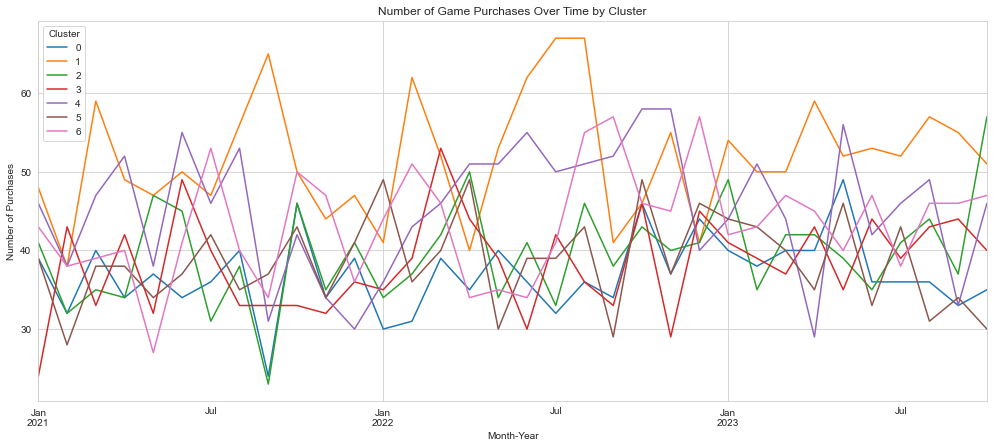

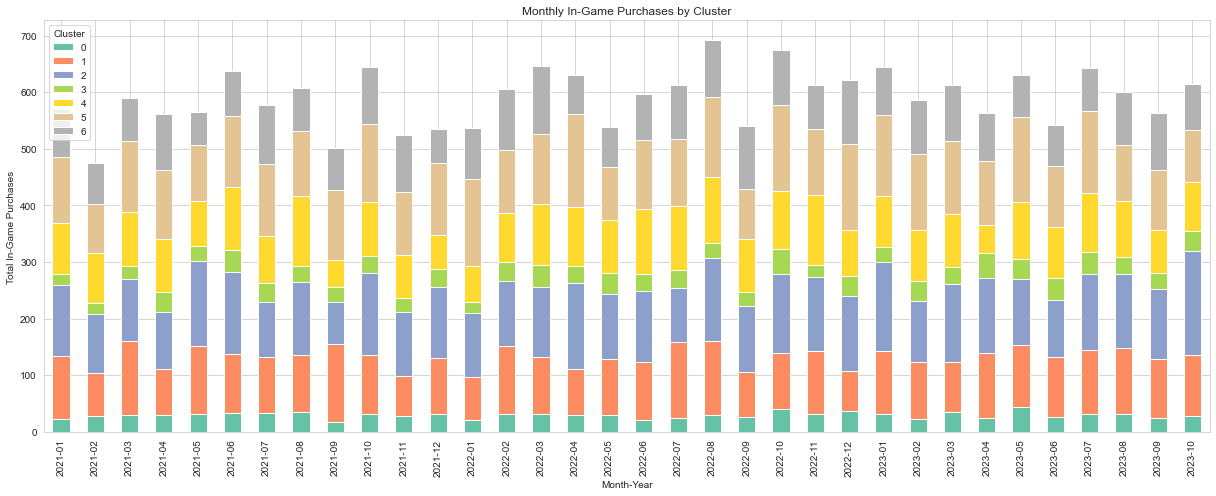

In [130]:
# Extracting month-year from purchase date
df["PurchaseMonth"] = df["PurchaseDate"].dt.to_period("M")  
purchases_over_time = df.groupby(["PurchaseMonth", "Cluster"]).size().unstack()

plt.figure(figsize=(17, 7))
purchases_over_time.plot(ax=plt.gca())
plt.title("Number of Game Purchases Over Time by Cluster")
plt.xlabel("Month-Year")
plt.ylabel("Number of Purchases")
plt.legend(title="Cluster")
plt.show()


# Grouping by purchase month and cluster, then summing in-game purchases
monthly_purchases = df.groupby(["PurchaseMonth", "Cluster"])["InGamePurchases"].sum().unstack()

# Plotting the analysis results of monthly in-game purchase using a stacked bar chart
plt.figure(figsize=(17, 7))
monthly_purchases.plot(kind="bar", stacked=True, ax=plt.gca(), colormap="Set2")
plt.title("Monthly In-Game Purchases by Cluster")
plt.xlabel("Month-Year")
plt.ylabel("Total In-Game Purchases")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()


## Generate New fictional data in order to do analyse Industry Trends and its alignment with our clusters

In [131]:
# Simulating additional user data

# User Demographics
ages = np.random.choice(range(15, 60), num_users)  # Age range from 15 to 60
genders = np.random.choice(["Male", "Female", "Non-binary", "Other"], num_users)
regions = np.random.choice(["North America", "Europe", "Asia", "South America", "Africa", "Oceania"], num_users)

# Game Preferences
genres = ["Action", "Adventure", "Strategy", "Sports", "RPG", "Simulation"]
preferred_genre = np.random.choice(genres, num_users)
graphics_importance = np.random.randint(1, 11, num_users)  # Scale of 1 to 10
storyline_importance = np.random.randint(1, 11, num_users)  # Scale of 1 to 10

# Industry Trends (binary response: 1 if interested, 0 otherwise)
vr_interest = np.random.randint(0, 2, num_users)
cross_platform_interest = np.random.randint(0, 2, num_users)
subscription_interest = np.random.randint(0, 2, num_users)
mobile_esports_interest = np.random.randint(0, 2, num_users)

# Adding simulated data to the original dataframe
df["Age"] = ages
df["Gender"] = genders
df["Region"] = regions
df["PreferredGenre"] = preferred_genre
df["GraphicsImportance"] = graphics_importance
df["StorylineImportance"] = storyline_importance
df["VRInterest"] = vr_interest
df["CrossPlatformInterest"] = cross_platform_interest
df["SubscriptionInterest"] = subscription_interest
df["MobileEsportsInterest"] = mobile_esports_interest

# Viewing the extended dataframe
df.head()


,UserID,GameTitle,PurchaseDate,Platform,Price,InGamePurchases,HoursPlayed,GameProgression,AchievementsUnlocked,MultiplayerUsage,...,Age,Gender,Region,PreferredGenre,GraphicsImportance,StorylineImportance,VRInterest,CrossPlatformInterest,SubscriptionInterest,MobileEsportsInterest
0,1,Anno 1800,2021-07-20,PS5,25.753325,1,46,27,45,0,...,35,Male,Africa,Adventure,6,3,1,0,1,0
1,2,Assassin's Creed Odissey,2022-11-18,PS5,45.033100,2,78,20,48,1,...,25,Other,Asia,Strategy,5,4,1,1,0,1
2,3,Anno 1800,2021-10-03,PS5,40.302989,0,71,50,28,0,...,25,Non-binary,South America,Action,2,4,0,1,0,1
3,4,Far Cry 6,2022-07-07,PS4,50.335581,4,43,11,9,0,...,26,Female,Oceania,RPG,10,8,0,0,1,1
4,5,Watch Dogs,2022-09-09,Switch,30.226732,4,71,17,19,1,...,42,Male,South America,Action,10,1,0,1,1,0


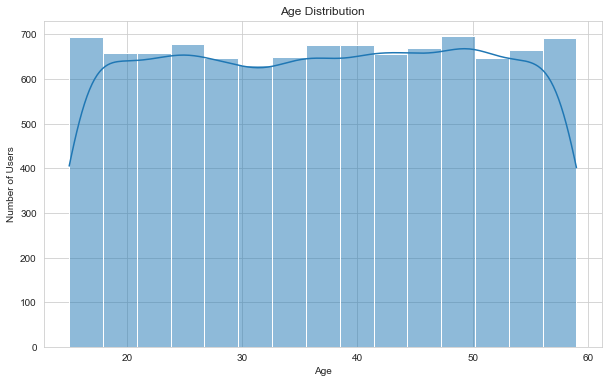

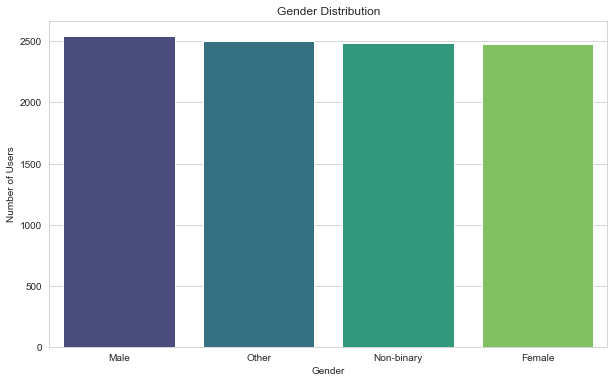

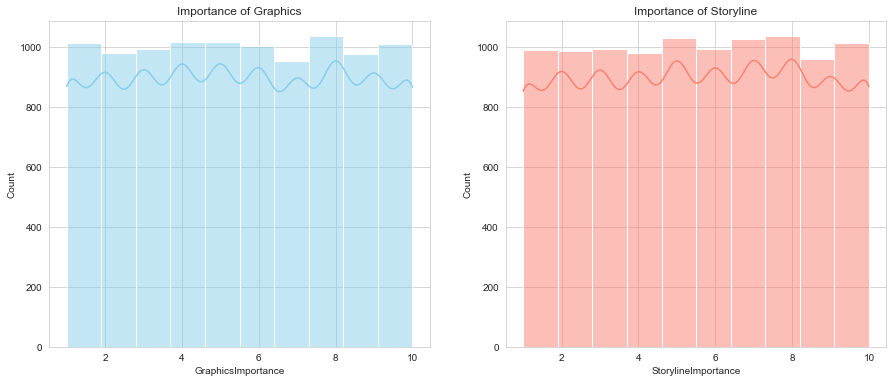

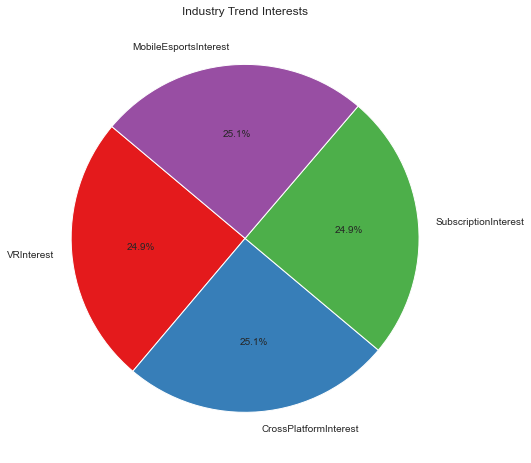

In [140]:
import seaborn as sns
import matplotlib.pyplot as plt

# Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df["Age"], bins=15, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Number of Users")
plt.show()

# Gender Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x="Gender", data=df, palette="viridis")
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Number of Users")
plt.show()
 
# Importance of Graphics and Storyline
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
sns.histplot(df["GraphicsImportance"], bins=10, kde=True, ax=ax[0], color="skyblue")
sns.histplot(df["StorylineImportance"], bins=10, kde=True, ax=ax[1], color="salmon")
ax[0].set_title("Importance of Graphics")
ax[1].set_title("Importance of Storyline")
plt.show()

# Recorded Industry trends in our video games
industry_trends = ["VRInterest", "CrossPlatformInterest", "SubscriptionInterest", "MobileEsportsInterest"] 
# Aggregating interest for each trend
trend_sums = df[industry_trends].sum()

# Plotting the aggregated interests in a pie chart
plt.figure(figsize=(10, 8))
trend_sums.plot(kind="pie", autopct="%1.1f%%", startangle=140, colors=sns.color_palette("Set1", len(industry_trends)))
plt.title("Industry Trend Interests")
plt.ylabel("")  # Removing the default "None" ylabel
plt.show()


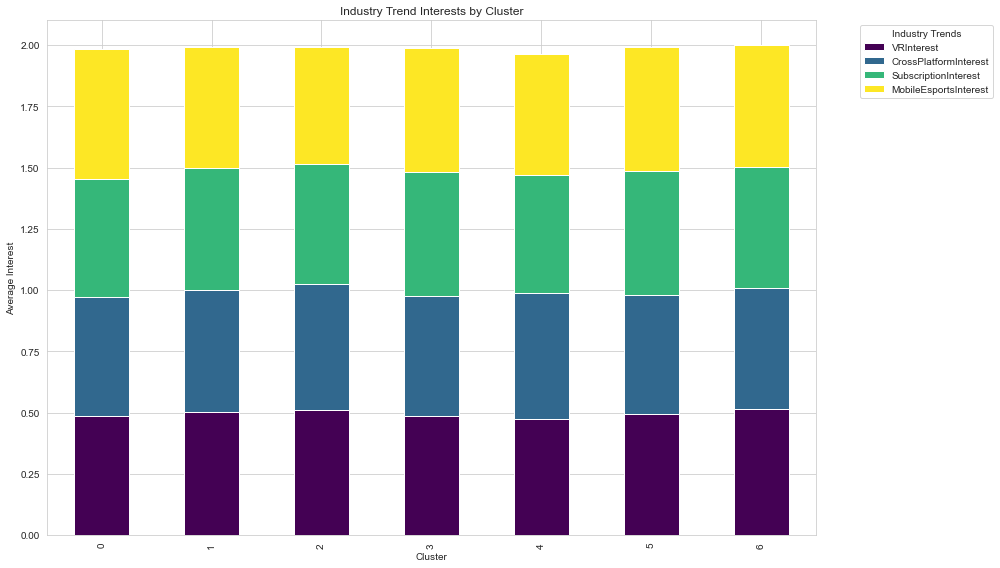

In [134]:
# Grouping by cluster and calculating mean interest for each trend
cluster_trend_interest = df.groupby('Cluster')[industry_trends].mean()

# Visualizing the results using stacked bar plots
cluster_trend_interest.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')
plt.title('Industry Trend Interests by Cluster')
plt.ylabel('Average Interest')
plt.xlabel('Cluster')
plt.legend(title='Industry Trends', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## This visualization above shows how each cluster aligns with the different industry trends. A higher bar indicates greater interest in that particular trend within a cluster. Comparing the heights of the bars across clusters will give insights into which segments are more likely to be influenced by upcoming industry changes related to these trends.

In [146]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Features and Target variable
features = df.drop(columns=industry_trends + ['UserID', 'PurchaseDate', 'PurchaseMonth', 'Cluster'])
target = df['VRInterest']

# Encoding categorical features
le = LabelEncoder()
features["GameTitle"] = le.fit_transform(features["GameTitle"])
features["Platform"] = le.fit_transform(features["Platform"])
features["Gender"] = le.fit_transform(features["Gender"])
features["Region"] = le.fit_transform(features["Region"])
features["PreferredGenre"] = le.fit_transform(features["PreferredGenre"])

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Scaling the features in order to have unit variance 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train.shape, X_test.shape


((8000, 17), (2000, 17))

## Predict target (industrial trend) 
#### With a logistic regression model

In [159]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report 

# Initialize the logistic regression model
logistic_regression_ml_model = LogisticRegression(random_state=42)

# Train the model
logistic_regression_ml_model.fit(X_train, y_train)

# Predict on the test set
y_pred = logistic_regression_ml_model.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy of the logistic regression model : {accuracy:.2f}")
print("This accuracy is normal as data are randomly generated")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy of the logistic regression model : 0.49
This accuracy is normal as data are randomly generated

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.58      0.54      1003
           1       0.49      0.40      0.44       997

    accuracy                           0.49      2000
   macro avg       0.49      0.49      0.49      2000
weighted avg       0.49      0.49      0.49      2000



#### Wath a Decision Tree Classifier Model

In [161]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the decision tree classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the model
decision_tree.fit(X_train, y_train)

# Predict on the test set
y_pred_tree = decision_tree.predict(X_test)

# Calculate the accuracy
accuracy_tree = accuracy_score(y_test, y_pred_tree)

print(f"Decision Tree Model Accuracy: {accuracy_tree:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_tree))


Decision Tree Model Accuracy: 0.52

Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.52      0.52      1003
           1       0.52      0.52      0.52       997

    accuracy                           0.52      2000
   macro avg       0.52      0.52      0.52      2000
weighted avg       0.52      0.52      0.52      2000

